In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Udemy Courses.csv")

In [3]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


# <h3>Baisc Information about Data</h3>

In [4]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [5]:
print(f"Total no of Rows:{df.shape[0]}")
print(f"Total no of Columns:{df.shape[1]}")

Total no of Rows:3682
Total no of Columns:11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [7]:
#checking null values
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [8]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3676, 11)

In [10]:
#get the statistics of data

In [11]:
df.describe(include='all')

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
count,3.676000e+03,3676,3676,3676,3676.000000,3676.000000,3676.000000,3676,3676,3676,3676
unique,NaN,3667,2,38,NaN,NaN,NaN,4,109,3676,4
top,NaN,Creating an animated greeting card via Google ...,True,20,NaN,NaN,NaN,All Levels,1 hour,2014-09-18T05:07:05Z,Web Development
freq,NaN,3,3366,827,NaN,NaN,NaN,1928,606,1,1199
mean,6.765390e+05,NaN,NaN,NaN,3187.668934,156.205114,40.096572,NaN,NaN,NaN,NaN
std,3.434354e+05,NaN,NaN,NaN,9483.366476,935.682615,50.407036,NaN,NaN,NaN,NaN
min,8.324000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,4.079370e+05,NaN,NaN,NaN,111.000000,4.000000,15.000000,NaN,NaN,NaN,NaN
50%,6.881680e+05,NaN,NaN,NaN,912.000000,18.000000,25.000000,NaN,NaN,NaN,NaN
75%,9.616435e+05,NaN,NaN,NaN,2544.000000,67.000000,46.000000,NaN,NaN,NaN,NaN


# EDA

# <h3>1. Univariate Analysis</h3>

In [12]:
# 1. what are all different subjects udemy is offering?
df.subject.unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [13]:
# 2. How many of no. courses for each subject available?
#sns.countplot(df.subject)

sdf=df.subject.value_counts().reset_index()

In [14]:
sdf.rename(columns={'index':'subject','subject':'no_of_courses'},inplace=True)

In [15]:
sdf

,subject,no_of_courses
0,Web Development,1199
1,Business Finance,1195
2,Musical Instruments,680
3,Graphic Design,602


Text(0, 0.5, 'No of courses')

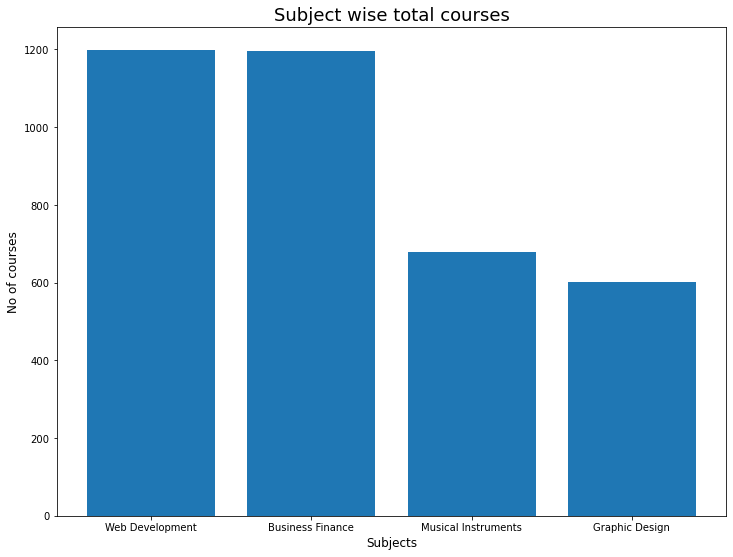

In [16]:
plt.figure(figsize=(12,9))
plt.title("Subject wise total courses",fontsize=18)
plt.bar(sdf.subject,sdf.no_of_courses)
plt.xlabel('Subjects',fontsize=12)
plt.ylabel('No of courses',fontsize=12)

In [17]:
#3. How many free and paid courses are available in Udemy?

In [18]:
#df[df['is_paid']==False]
#sns.countplot(df.is_paid)

In [19]:
df.is_paid.value_counts()

True     3366
False     310
Name: is_paid, dtype: int64

In [20]:
print("3366 courses are paid \n310 courses are free.")

3366 courses are paid 
310 courses are free.


In [21]:
# 4. Which are top selling courses?

In [22]:
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments


In [23]:
df.sort_values(by='num_subscribers',ascending=False)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
403,1221942,Basic Bookkeeping,True,35,0,0,12,Beginner Level,44 mins,2017-05-23T16:20:18Z,Business Finance
2596,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,37 mins,2014-04-15T21:48:55Z,Graphic Design
994,603902,Curso de Didgeridoo nivel principiante,True,50,0,0,31,Beginner Level,1 hour,2016-04-11T04:14:05Z,Musical Instruments
476,1252410,Beginners Guide to Kindle Ebook Covers Design ...,True,20,0,0,16,All Levels,1.5 hours,2017-06-19T19:26:46Z,Graphic Design


In [24]:
# 5. Which are the least selling courses?

In [25]:
df.sort_values('num_subscribers',ascending=True).head(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2290,1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,32 mins,2017-05-22T17:14:43Z,Musical Instruments
3261,1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2 hours,2017-07-03T17:39:57Z,Graphic Design
491,1251582,Best Practices in Corporate Budgeting,True,50,0,0,9,Intermediate Level,2 hours,2017-06-29T22:01:56Z,Business Finance
484,1032648,beginning accounting,True,20,0,0,12,Intermediate Level,38 mins,2016-12-26T16:52:47Z,Business Finance
91,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,True,20,0,0,5,Beginner Level,31 mins,2017-07-06T16:12:34Z,Musical Instruments
480,993892,Beginners Guitar Course - 'Try it and love it ...,True,25,0,0,16,Beginner Level,2 hours,2016-10-31T18:10:06Z,Musical Instruments
476,1252410,Beginners Guide to Kindle Ebook Covers Design ...,True,20,0,0,16,All Levels,1.5 hours,2017-06-19T19:26:46Z,Graphic Design
3328,715476,The Cuckoo Strategy to get European Funding,True,160,0,0,6,All Levels,1 hour,2016-01-06T02:38:23Z,Business Finance
714,1168172,Case studies on credit appraisal for bankers,True,20,0,0,15,Beginner Level,3.5 hours,2017-05-01T20:16:26Z,Business Finance
98,1219820,Accounting - The 6 most important rules you mu...,True,20,0,0,9,All Levels,1 hour,2017-05-25T21:55:50Z,Business Finance


In [26]:
#6. In every level how many courses are available?
df.level.value_counts()

All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [27]:
df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [28]:
#convert price column data type to float

In [29]:
df.price=pd.to_numeric(df['price'],errors='coerce')


In [30]:
#df.insert(3,column='Price',value=x)  -- insert column at specific position

In [31]:
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75.0,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75.0,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75.0,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120.0,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70.0,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40.0,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,NaN,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


C:\Users\Biswajit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

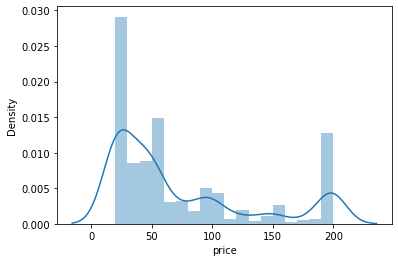

In [32]:
sns.distplot(df['price'])

C:\Users\Biswajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

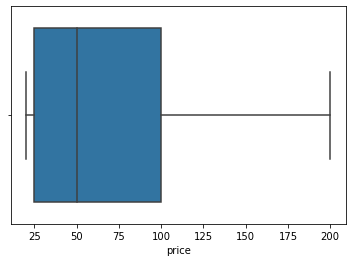

In [33]:
sns.boxplot(df['price'])

(array([1266.,  802.,  131.,  159.,  296.,   91.,   48.,   94.,   41.,
         438.]),
 array([ 20.,  38.,  56.,  74.,  92., 110., 128., 146., 164., 182., 200.]),
 <BarContainer object of 10 artists>)

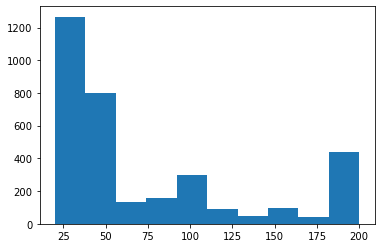

In [34]:
plt.hist(df.price)

In [35]:
print("From the histplot we can say -> price between (20 - 55) has more number of courses")

From the histplot we can say -> price between (20 - 55) has more number of courses


# <h3>2. Bivariate Analysis</h3>

In [36]:
df.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75.0,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75.0,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75.0,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [37]:
#sns.scatterplot(df['price'],df['num_subscribers'])

In [39]:
#content_duration type change to float
df.content_duration=pd.to_numeric(df.content_duration,errors='coerce')

In [40]:
#published_timestamp type change to datetime
df.published_timestamp=pd.to_datetime(df.published_timestamp)     

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3681
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3676 non-null   int64              
 1   course_title         3676 non-null   object             
 2   is_paid              3676 non-null   bool               
 3   price                3366 non-null   float64            
 4   num_subscribers      3676 non-null   int64              
 5   num_reviews          3676 non-null   int64              
 6   num_lectures         3676 non-null   int64              
 7   level                3676 non-null   object             
 8   content_duration     1 non-null      float64            
 9   published_timestamp  3676 non-null   datetime64[ns, UTC]
 10  subject              3676 non-null   object             
 11  year                 3676 non-null   int64              
dtypes: bool(1), datetime

In [42]:
#1. Find the relation between course price and number of subscribers

Text(0, 0.5, 'Subscribers')

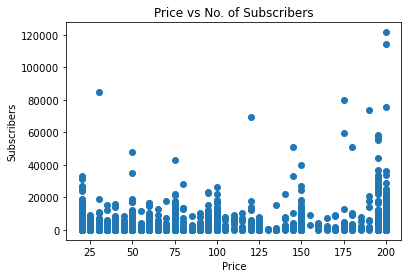

In [43]:
plt.title('Price vs No. of Subscribers')
plt.scatter(df.price,df.num_subscribers)
plt.xlabel('Price')
plt.ylabel('Subscribers')

<BarContainer object of 3676 artists>

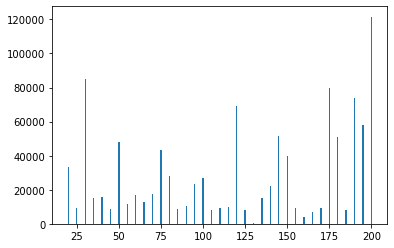

In [85]:
plt.bar(df.price,df.num_subscribers)

In [44]:
print("Number of subscribers are more where course price is above 190")

Number of subscribers are more where course price is above 190


In [45]:
# 2. Find the number of subscribers based on course level

Text(0, 0.5, 'Subscribers')

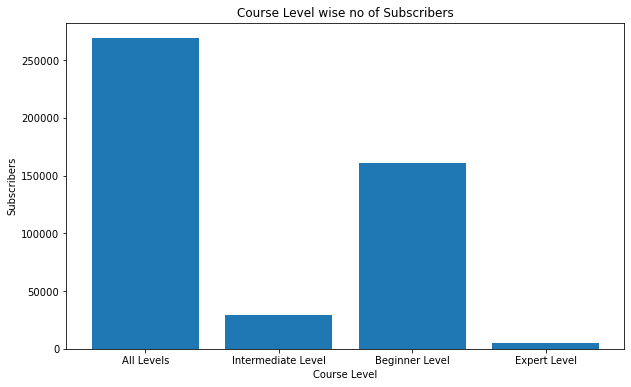

In [46]:
plt.figure(figsize=(10,6))
plt.title('Course Level wise no of Subscribers')
plt.bar(df.level,df.num_subscribers)
plt.xlabel('Course Level')
plt.ylabel('Subscribers')

In [47]:
print("Level wise no. of subscribers in descending order:")
print("a. All levels\nb. Beginner Level \nc. Intermediate Level\nd. Expert Level")

Level wise no. of subscribers in descending order:
a. All levels
b. Beginner Level 
c. Intermediate Level
d. Expert Level


In [48]:
# 3.show all the courses of graphic Designs where course price  < 100 

In [49]:
df.subject.unique().tolist()

['Musical Instruments',
 'Business Finance',
 'Graphic Design',
 'Web Development']

In [50]:
df[(df['subject']=='Graphic Design') & (df['price']<100)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25.0,72,5,17,Beginner Level,NaN,2014-04-29 19:50:31+00:00,Graphic Design
20,1165268,15 Motion Graphic Elements in After Effect (S...,True,30.0,8,0,20,Intermediate Level,NaN,2017-04-11 04:27:34+00:00,Graphic Design
35,1164876,3DS MAX - Learn 3Ds MAX tutorial for Beginners...,True,20.0,785,2,29,All Levels,NaN,2017-04-18 16:45:59+00:00,Graphic Design
39,599652,48 Logo Designs and Techniques,True,20.0,113,9,48,All Levels,NaN,2015-09-15 00:23:14+00:00,Graphic Design
52,794036,8 Stunden professionelles Cinema 4D Training,True,50.0,18,1,38,All Levels,NaN,2016-03-22 20:51:28+00:00,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...
3568,133968,Web Elements Design With Photoshop,True,45.0,5072,38,44,All Levels,NaN,2014-10-21 19:18:12+00:00,Graphic Design
3588,1131780,"Whiteboard Animation, Beginner To Expert - In ...",True,20.0,1343,25,16,All Levels,NaN,2017-03-14 20:52:30+00:00,Graphic Design
3639,1122306,Wordpress: Comment utiliser le thème FABLE,True,20.0,1,0,10,Beginner Level,NaN,2017-03-07 16:53:27+00:00,Graphic Design
3671,144222,"YOU can Draw, Shade and Paint a Mixed Media Gi...",True,30.0,1249,44,19,Beginner Level,NaN,2014-01-28 02:30:26+00:00,Graphic Design


In [51]:
#4. a.show the most popular web development course for 'All Levels'

In [52]:
web_df=df[df['subject']=='Web Development'].reset_index()

In [53]:
web_df[web_df['num_subscribers']==web_df[web_df['level']=='All Levels']['num_subscribers'].max()]

,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
687,2230,41295,Learn HTML5 Programming From Scratch,False,NaN,268923,8629,45,All Levels,NaN,2013-02-14 07:03:41+00:00,Web Development


In [54]:
#4. b.show the most popular web development course for 'Expert Level'

In [55]:
web_df[web_df['num_subscribers']==web_df[web_df['level']=='Expert Level']['num_subscribers'].max()]

,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
540,1991,661802,JavaScript Design Patterns: 20 Patterns for Ex...,True,95.0,2789,243,26,Expert Level,NaN,2015-11-12 19:01:10+00:00,Web Development


In [87]:
#4. c. How many web development courses are free and paid?

In [88]:
web_df.is_paid.value_counts()

True     1066
False     133
Name: is_paid, dtype: int64

In [ ]:
# 1066 courses are paid 
# 133 courses are free 

In [56]:
# 5. list all the courses that are related with Python and with price >100

In [57]:
df[(df.course_title.str.contains('Python')) & (df.price>100)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120.0,1299,56,71,Intermediate Level,NaN,2016-08-11 22:09:24+00:00,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195.0,23412,799,251,All Levels,NaN,2013-04-08 00:46:14+00:00,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110.0,7489,941,173,All Levels,NaN,2015-11-08 20:57:35+00:00,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195.0,2497,98,154,All Levels,NaN,2014-05-29 00:58:43+00:00,Web Development
2906,368340,Professional Python Web Development Using Flask,True,120.0,3420,489,102,Beginner Level,NaN,2015-03-04 00:10:36+00:00,Web Development
2908,1035940,Professional RESTful API Design using Python F...,True,120.0,578,25,36,Intermediate Level,NaN,2017-01-11 21:15:25+00:00,Web Development
2953,1070886,Python Algo Trading: FX Trading with Oanda,True,200.0,453,42,33,Intermediate Level,NaN,2017-03-14 00:39:45+00:00,Business Finance
2954,1196544,Python Algo Trading: Sentiment Trading with News,True,200.0,294,19,42,All Levels,NaN,2017-04-28 16:41:44+00:00,Business Finance
2955,822444,Python and Django Full Stack Web Developer Boo...,True,200.0,11832,1883,191,All Levels,NaN,2017-02-24 18:40:55+00:00,Web Development
2956,477702,Python for Beginners: Python Programming Langu...,True,150.0,6153,125,84,Beginner Level,NaN,2015-06-14 18:18:57+00:00,Web Development


In [58]:
#6. Year wise how many number of courses published

In [59]:
#first convert the column published_timestamp to datetime datatype
#df.published_timestamp=pd.to_datetime(df.published_timestamp)

In [60]:
#extract the year from the published_timestamp column

In [61]:
#create new column year

In [62]:
df['year']=df.published_timestamp.dt.year

In [63]:
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,NaN,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,NaN,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75.0,482,1,47,Intermediate Level,NaN,2017-04-26 18:34:57+00:00,Musical Instruments,2017


In [64]:
df.year.unique()

array([2014, 2017, 2016, 2015, 2013, 2012, 2011], dtype=int64)

In [65]:
ydf=df.groupby('year')['course_id'].count().reset_index()

In [66]:
ydf.rename(columns={'course_id':'total_courses'},inplace=True)

In [67]:
ydf

,year,total_courses
0,2011,5
1,2012,45
2,2013,201
3,2014,490
4,2015,1014
5,2016,1204
6,2017,717


Text(0, 0.5, 'Total Courses')

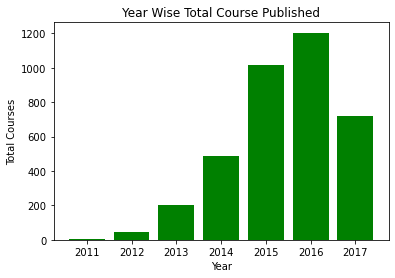

In [68]:
plt.title('Year Wise Total Course Published')
plt.bar(ydf.year,ydf.total_courses,color='g')
plt.xlabel('Year')
plt.ylabel('Total Courses')

In [69]:
df.groupby('year')['num_subscribers'].max()

year
2011     69186
2012    101154
2013    268923
2014    120291
2015    121584
2016    114512
2017     26742
Name: num_subscribers, dtype: int64

In [70]:
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,NaN,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,NaN,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75.0,482,1,47,Intermediate Level,NaN,2017-04-26 18:34:57+00:00,Musical Instruments,2017


In [71]:
#7. In 2017 most popular courses for every levels

In [72]:
p_df=df[df.year==2017].reset_index()

In [73]:
p_df.groupby('level')['num_subscribers'].max()

level
All Levels            17784
Beginner Level        26742
Expert Level           1580
Intermediate Level     9351
Name: num_subscribers, dtype: int64

In [74]:
p_df[(p_df.level=='All Levels') & (p_df['num_subscribers']==17784)]

,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
628,3301,1107524,The Complete NodeJS Course: Build a Full Busin...,True,195.0,17784,260,61,All Levels,NaN,2017-02-13 17:18:59+00:00,Web Development,2017


In [75]:
p_df[(p_df.level=='Beginner Level') & (p_df['num_subscribers']==26742)]

,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
650,3374,874012,The Ultimate Drawing Course - Beginner to Adva...,True,150.0,26742,2379,62,Beginner Level,NaN,2017-01-23 00:20:05+00:00,Graphic Design,2017


In [76]:
p_df[(p_df.level=='Expert Level') & (p_df['num_subscribers']==1580)]

,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
285,1557,1142570,How I Learned Stock Trading (and How You Can Too),True,200.0,1580,12,53,Expert Level,NaN,2017-05-02 21:20:54+00:00,Business Finance,2017


In [77]:
p_df[(p_df.level=='Intermediate Level') & (p_df['num_subscribers']==9351)]

,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
374,2036,1191750,"Jazz Guitar Tips, Tricks and Licks",False,NaN,9351,331,21,Intermediate Level,NaN,2017-05-01 02:32:12+00:00,Musical Instruments,2017


In [78]:
df.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,NaN,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,NaN,2017-04-12 19:06:34+00:00,Musical Instruments,2017


In [79]:
df.describe(include='all')

C:\Users\Biswajit\AppData\Local\Temp/ipykernel_9692/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
count,3.676000e+03,3676,3676,3366.000000,3676.000000,3676.000000,3676.000000,3676,1.0,3676,3676,3676.000000
unique,NaN,3667,2,NaN,NaN,NaN,NaN,4,NaN,3676,4,NaN
top,NaN,Creating an animated greeting card via Google ...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2014-09-18 05:07:05+00:00,Web Development,NaN
freq,NaN,3,3366,NaN,NaN,NaN,NaN,1928,NaN,1,1199,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-07-09 05:43:31+00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-06 21:46:30+00:00,NaN,NaN
mean,6.765390e+05,NaN,NaN,72.147950,3187.668934,156.205114,40.096572,NaN,0.0,NaN,NaN,2015.432807
std,3.434354e+05,NaN,NaN,60.221287,9483.366476,935.682615,50.407036,NaN,NaN,NaN,NaN,1.185215
min,8.324000e+03,NaN,NaN,20.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN,2011.000000
25%,4.079370e+05,NaN,NaN,25.000000,111.000000,4.000000,15.000000,NaN,0.0,NaN,NaN,2015.000000


In [80]:
df[df['course_title']=='Acoustic Blues Guitar Lessons']

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
136,99324,Acoustic Blues Guitar Lessons,False,NaN,8217,109,10,Intermediate Level,NaN,2013-09-30 20:45:20+00:00,Musical Instruments,2013
137,112314,Acoustic Blues Guitar Lessons,True,125.0,1284,136,40,Intermediate Level,NaN,2013-11-28 08:54:00+00:00,Musical Instruments,2013
138,647276,Acoustic Blues Guitar Lessons,True,75.0,189,18,101,Intermediate Level,NaN,2016-01-10 21:39:42+00:00,Musical Instruments,2016


In [92]:
df.describe(include='all')

C:\Users\Biswajit\AppData\Local\Temp/ipykernel_9692/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
count,3.676000e+03,3676,3676,3366.000000,3676.000000,3676.000000,3676.000000,3676,1.0,3676,3676,3676.000000
unique,NaN,3667,2,NaN,NaN,NaN,NaN,4,NaN,3676,4,NaN
top,NaN,Creating an animated greeting card via Google ...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2014-09-18 05:07:05+00:00,Web Development,NaN
freq,NaN,3,3366,NaN,NaN,NaN,NaN,1928,NaN,1,1199,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-07-09 05:43:31+00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-06 21:46:30+00:00,NaN,NaN
mean,6.765390e+05,NaN,NaN,72.147950,3187.668934,156.205114,40.096572,NaN,0.0,NaN,NaN,2015.432807
std,3.434354e+05,NaN,NaN,60.221287,9483.366476,935.682615,50.407036,NaN,NaN,NaN,NaN,1.185215
min,8.324000e+03,NaN,NaN,20.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN,2011.000000
25%,4.079370e+05,NaN,NaN,25.000000,111.000000,4.000000,15.000000,NaN,0.0,NaN,NaN,2015.000000


# Conclusion

In [94]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

   
1. In Udemy total 3676 courses available:
     - 3366 are Paid 
     - 310 are Free
     
2. Total 4 subjects are available: 
     - Musical Instruments
     - Business Finance
     - Graphic Design
     - Web Development
     
3. Every subject have 4 Level of courses: 
     - All Levels
     - Intermediate Level
     - Beginner Level
     - Expert Level

2. Most Popular subject is Web Development:
     - It has 1199 courses
     - 1066 courses are paid 
     - 133 courses are free 
     - Most popular web development course has 268923 number of subscribers
     
3. Maximum course price is 200
   Minimum Course price is 20
   Average Course price is 72

 - According to the max price no of subscribers are high

4.  Year wise course published in Udemy:
    2011  -  69186
    2012  - 101154
    2013  - 268923
    2014  - 120291
    2015  - 121584
    2016  - 114512
    2017  -  26742